<h2>Importe</h2>

In [3]:
import pickle

import numpy
import pandas as pd
import numpy as np
import os
import src.data as data
import torch
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import math


<h2>Methoden</h2>

In [4]:
#Straight up stolen from main.py
def calc_roc_auc(gts, probs):
    try:
        auc = metrics.roc_auc_score(gts, probs)
        if np.isnan(auc):
            auc = 0
            return auc
    except:
        print("except")
        return 0


In [5]:
def map_value(value):
    if value >= 0.5:
        return 1
    else:
        return 0

<h2>Laden der gespeicherten Daten und der Modelle</h2>

In [6]:
data_list = []
with open(r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\data_plot\test_data", "rb") as input:
    while True:
        try:
            x = pickle.load(input)
        except EOFError:
            break
        data_list.append(x)



In [7]:
len(data_list)

5

In [8]:
model_list = []
dir = r"C:\Users\ReneJ\Desktop\UnityStuff\patway-net\model"
for file in os.listdir(dir):
    filename = os.fsdecode(file)
    if "_15" in filename:
        model_list.append(torch.load(dir + "\\" + file))


In [9]:
len(model_list)

5

In [11]:
lowest_len = math.inf
for ds in data_list:
    if len(ds["x_test_seq"]) < lowest_len:
        lowest_len = len(ds["x_test_seq"])


In [11]:
lowest_len

183

In [59]:
(data_list[0]["x_test_seq"][5:10])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [15]:
y_values = []

n = 0
for model, dataset in zip(model_list,data_list):
    values = {"fold" : dataset["fold"], "data" : []}
    print(n)
    n += 1
    i = 5
    pre_i = 0
    seq = torch.from_numpy(dataset["x_test_seq"])
    stat = torch.from_numpy(dataset["x_test_stat"])
    label = torch.from_numpy(dataset["label"])
    timestamps = seq.shape[1]
    for t in range(1, timestamps):
        pre_t = 0
        model.eval()
        with torch.no_grad():
            seq_ = seq[:,pre_t:t,:]

            prediction = torch.sigmoid(model.forward(seq[i][0:5], stat[0:5]))

            prediction = torch.sigmoid(model.forward(seq, stat))
            prediction = [map_value([0][0]) for pred in prediction]
            print(prediction)
            #values["data"].append(calc_roc_auc(dataset["label"], prediction))
            fpr, tpr, x = metrics.roc_curve(dataset["label"][pre_i : i], prediction)
            values["data"].append(metrics.auc(fpr, tpr))

        pre_t = t
    y_values.append(values)

0


KeyboardInterrupt: 

In [134]:
torch.from_numpy(dataset["x_test_stat"])[[0,2,4]]

tensor([[1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.6111,
         1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.6111,
         1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.6111,
         1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.0000,
         0.0000, 1.0000, 0.0000, 1.0000, 1.0000]], dtype=torch.float64)

In [140]:
def getPrefixLength(seq, sample):
    counter = 0
    rowCounter = -1
    lastRow = None
    actualPrefixRows = 0
    for matrix in seq[sample,:,:]:
        #print(matrix)
        rowCounter += 1

        notZero = False

        for x in matrix:
            x = float(x)
            if x != 0:
                notZero = True
                break

        if notZero:
            lastRow = matrix
            actualPrefixRows = rowCounter

    if lastRow != None:
        for entry in lastRow:
            if entry == 0:
                counter += 1

            if entry != 0:
                counter += 1
                break

    #print(actualPrefixRows)
    #print(counter)
    #print(rowCounter)
    #print(lastRow)

    return counter + (actualPrefixRows * len(lastRow))

In [155]:
getPrefixLength((torch.from_numpy(data_list[0]["x_test_seq"])), 31)

241

In [161]:
def getPrefixDictionary(seq):
    timestamps = seq.shape[1]
    mapList = []
    uniquePrefixSizes = []
    for t in range(0, timestamps):
        indexPrefixSizeMap = {"index" : t, "prefixSize" : getPrefixLength(seq, t)}
        #print("sample " + str(t) + ": " + str(getPrefixLength(seq, t)))
        mapList.append(indexPrefixSizeMap)
        uniquePrefixSizes.append(getPrefixLength(seq, t))

    uniquePrefixSizes = set(uniquePrefixSizes)
    #print(uniquePrefixSizes)

    prefixDictionary = {}
    for prefixSize in uniquePrefixSizes:
        prefixDictionary[str(prefixSize)] = []
        for entry in mapList:
            if entry["prefixSize"] == prefixSize:
                prefixDictionary[str(prefixSize)].append(entry["index"])

    #print(prefixDictionary)
    return prefixDictionary


In [162]:
getPrefixDictionary((torch.from_numpy(data_list[0]["x_test_seq"])))

{'129': [8, 24, 41],
 '257': [32],
 '4': [0, 16, 33, 44, 47],
 '145': [9, 25, 42],
 '21': [1, 17, 34, 45, 48],
 '161': [10, 26, 43],
 '38': [2, 18, 35, 46, 49],
 '177': [11, 27],
 '51': [19, 36],
 '55': [3],
 '193': [12, 28],
 '65': [20, 37],
 '72': [4],
 '209': [13, 29],
 '82': [5],
 '81': [21, 38],
 '225': [14, 30],
 '98': [6],
 '97': [22, 39],
 '113': [7, 23, 40],
 '241': [15, 31]}

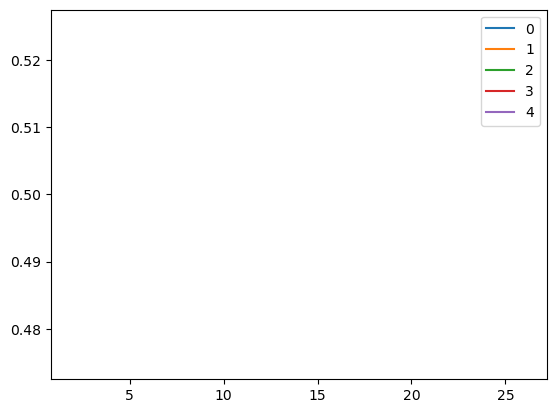

In [85]:

for y in y_values:
    x_axis = range(0, len(y["data"]))
    plt.plot(x_axis, y["data"], label = y["fold"])

plt.legend()
plt.show()